# Austin Animal Center Needs Analysis

![Austin-shelter](./images/austin-animal-center.jpg)

## Overview

This project analyzes the resource needs of the [Austin Animal Center](https://www.austintexas.gov/department/aac) (AAC), which shelters 16,000 animals annually with a [No Kill policy](https://www.austintexas.gov/blog/no-kill-austin). Descriptive analysis of animal intake and outcome data shows that some animals require extended stays and that the number of sheltered animals varies seasonally. The Austin Animal Center can use this analysis to adjust outreach, hiring, and space utilization to improve resource allocation.

## Business Problem

![img](./images/animals.png)

The Austin Animal Shelter may be able to improve their resource allocation to both reduce costs and ensure that the center has staff and space to care for the animals brought to them. Doing so will allow the Austin Animal Shelter to better serve its clients while also freeing up resources to expand the scope of services they can offer. Using AAC's animal intake and outcome data, I describe patterns in intakes, stays, and exits to anticipate AAC's outreach, space, and staffing needs for supporting sheltered animals.

## Data Understanding

![img2](./images/pet-resource-center-og.jpg)

The Austin Animal Center has the longest running public dataset of animal rescues in the country. Every animal has a unique ID associated with both their [intake](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and [outcome](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) data. The data files provide the dates and types of each event, as well as other animal characteristics (e.g. type, sex). 

In [143]:
import pandas as pd
import numpy as np

In [144]:
intakes = pd.read_csv('./data/Austin_Animal_Center_Intakes_082620.csv')
outcomes = pd.read_csv('./data/Austin_Animal_Center_Outcomes_082620.csv')

In [145]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119853 entries, 0 to 119852
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         119853 non-null  object
 1   Name              82042 non-null   object
 2   DateTime          119853 non-null  object
 3   MonthYear         119853 non-null  object
 4   Found Location    119853 non-null  object
 5   Intake Type       119853 non-null  object
 6   Intake Condition  119853 non-null  object
 7   Animal Type       119853 non-null  object
 8   Sex upon Intake   119852 non-null  object
 9   Age upon Intake   119853 non-null  object
 10  Breed             119853 non-null  object
 11  Color             119853 non-null  object
dtypes: object(12)
memory usage: 11.0+ MB


In [146]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119962 entries, 0 to 119961
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         119962 non-null  object
 1   Name              82265 non-null   object
 2   DateTime          119962 non-null  object
 3   MonthYear         119962 non-null  object
 4   Date of Birth     119962 non-null  object
 5   Outcome Type      119956 non-null  object
 6   Outcome Subtype   54873 non-null   object
 7   Animal Type       119962 non-null  object
 8   Sex upon Outcome  119961 non-null  object
 9   Age upon Outcome  119959 non-null  object
 10  Breed             119962 non-null  object
 11  Color             119962 non-null  object
dtypes: object(12)
memory usage: 11.0+ MB


### Intake Data

The intake dataset includes records from October 2013 to August 2020, and includes a wide variety of intake types, intake conditions, and animal types.

In [147]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [148]:
intakes['Intake Date'] =  pd.to_datetime(intakes['DateTime'])
intakes['Intake Date'].describe()

count                  119853
unique                  84556
top       2016-09-23 12:00:00
freq                       64
first     2013-10-01 07:51:00
last      2020-08-26 07:01:00
Name: Intake Date, dtype: object

In [149]:
intakes['Intake Type'].value_counts()

Stray                 83873
Owner Surrender       23493
Public Assist          7349
Wildlife               4702
Euthanasia Request      257
Abandoned               179
Name: Intake Type, dtype: int64

In [150]:
intakes['Intake Condition'].value_counts()

Normal      104686
Injured       6196
Sick          4775
Nursing       3330
Aged           414
Other          221
Feral          106
Pregnant        74
Medical         43
Behavior         8
Name: Intake Condition, dtype: int64

In [151]:
intakes['Animal Type'].value_counts()

Dog          67990
Cat          44947
Other         6337
Bird           558
Livestock       21
Name: Animal Type, dtype: int64

### Outcome Data

The outcome dataset also includes records from October 2013 to August 2020, and includes a variety of outcome types.

In [152]:
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [153]:
outcomes['Outcome Date'] =  pd.to_datetime(outcomes['DateTime'])
outcomes['Outcome Date'].describe()

count                  119962
unique                  98921
top       2016-04-18 00:00:00
freq                       39
first     2013-10-01 09:31:00
last      2020-08-26 09:19:00
Name: Outcome Date, dtype: object

In [154]:
outcomes['Outcome Type'].value_counts()

Adoption           52875
Transfer           35640
Return to Owner    20947
Euthanasia          8112
Died                1122
Rto-Adopt            636
Disposal             536
Missing               67
Relocate              21
Name: Outcome Type, dtype: int64

In [155]:
outcomes['Outcome Subtype'].value_counts()[:10]

Partner        29824
Foster          9864
Rabies Risk     3531
SCRP            3211
Suffering       3155
Snr             2601
In Kennel        572
Aggressive       536
Offsite          383
Medical          301
Name: Outcome Subtype, dtype: int64

## Data Preparation

### Data Cleaning

For the intake and outcome files, I make them easier to work with by normalizing column names and dropping unnecessary columns.

In [156]:
# Make column names easier to use
intakes.columns = intakes.columns.str.lower().str.replace(' ', '_')

# Drop unnecessary columns
intakes.drop(columns = ['name', 'datetime', 'monthyear', 'found_location', 'age_upon_intake', 'color'], inplace=True )

In [157]:
# Make column names easier to use
outcomes.columns = outcomes.columns.str.lower().str.replace(' ', '_')

# Drop unnecessary columns
outcomes.drop(columns = ['name', 'datetime', 'monthyear', 'date_of_birth', 'age_upon_outcome', 'sex_upon_outcome', 'animal_type', 'breed', 'color'], inplace=True )

### Merging Datasets

Before merging the datasets, I create a new `event_num` variable indexing the count of the intake or outcome for each animal ID. This will allow for a 1:1 merge.

In [158]:
intakes['event_num'] = intakes.sort_values(['intake_date']).groupby(['animal_id']).rank()
outcomes['event_num'] = outcomes.sort_values(['outcome_date']).groupby(['animal_id']).rank()

Combining the two files yields a single dataset for feature engineering and analysis. I exclude any unmatched outcome or intake data to ensure there are no missing values for the date features. I also exclude mismatched data so that analyses of stay lengths do not end including animals with negative numbers of days in shelter.

In [159]:
# Merge intakes and outcomes on animal id and year
animal_shelter_df  = pd.merge(intakes, 
                              outcomes, 
                              on=['animal_id', 'event_num'], 
                              how='left')

In [160]:
# Filter out animals who have yet to have outcomes and keeps animals where outcome data is later than intake date
animal_shelter_df = animal_shelter_df[(~animal_shelter_df['outcome_date'].isna()) 
                                    & (animal_shelter_df['outcome_date'] > animal_shelter_df['intake_date'])]
    
# Sorts the column names to be alphabetical
animal_shelter_df = animal_shelter_df[animal_shelter_df.columns.sort_values()]

In [161]:
animal_shelter_df.head(3)

,animal_id,animal_type,breed,event_num,intake_condition,intake_date,intake_type,outcome_date,outcome_subtype,outcome_type,sex_upon_intake
0,A786884,Dog,Beagle Mix,1.0,Normal,2019-01-03 16:19:00,Stray,2019-01-08 15:11:00,Partner,Transfer,Neutered Male
1,A706918,Dog,English Springer Spaniel,1.0,Normal,2015-07-05 12:59:00,Stray,2015-07-05 15:13:00,NaN,Return to Owner,Spayed Female
2,A724273,Dog,Basenji Mix,1.0,Normal,2016-04-14 18:43:00,Stray,2016-04-21 17:17:00,NaN,Return to Owner,Intact Male


### Feature Engineering

I create a `days_in_shelter` feature to analyze the amount of time animals spend at AAC.

In [162]:
animal_shelter_df['days_in_shelter'] = (animal_shelter_df['outcome_date'] - animal_shelter_df['intake_date']).dt.days

I create `year_month` features for aggregating values by month in my analysis.

In [163]:
# NOTE TO STUDENTS: You will learn better methods for handling time series data later in the course

animal_shelter_df['intake_year_month'] = animal_shelter_df['intake_date'].apply(lambda x: str(x.year) + '-' + x.strftime('%m'))
animal_shelter_df['outcome_year_month'] = animal_shelter_df['outcome_date'].apply(lambda x: str(x.year) + '-' + x.strftime('%m'))

In [164]:
animal_shelter_df.head(3)

,animal_id,animal_type,breed,event_num,intake_condition,intake_date,intake_type,outcome_date,outcome_subtype,outcome_type,sex_upon_intake,days_in_shelter,intake_year_month,outcome_year_month
0,A786884,Dog,Beagle Mix,1.0,Normal,2019-01-03 16:19:00,Stray,2019-01-08 15:11:00,Partner,Transfer,Neutered Male,4,2019-01,2019-01
1,A706918,Dog,English Springer Spaniel,1.0,Normal,2015-07-05 12:59:00,Stray,2015-07-05 15:13:00,NaN,Return to Owner,Spayed Female,0,2015-07,2015-07
2,A724273,Dog,Basenji Mix,1.0,Normal,2016-04-14 18:43:00,Stray,2016-04-21 17:17:00,NaN,Return to Owner,Intact Male,6,2016-04,2016-04


In [165]:
# Save cleaned dataset as CSV
animal_shelter_df.to_csv('./data/cleaned_animal_center_df.csv')

## Analysis

In [166]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Length of Stay

Most animals have short stays at AAC, with a median of 5 days. However, some animals take a very long time to exit - sometimes over 6 months! These extended stays may be partly a result of AAC's No Kill policy.

In [167]:
animal_shelter_df['days_in_shelter'].describe()

count    118350.000000
mean         17.500625
std          41.767333
min           0.000000
25%           1.000000
50%           5.000000
75%          14.000000
max        1521.000000
Name: days_in_shelter, dtype: float64

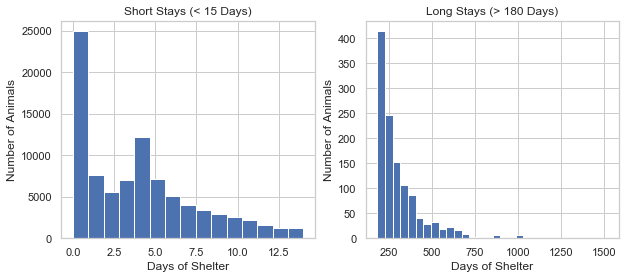

In [170]:
# Create plot
stay_length_fig, stay_length_axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

stay_length_axes[0].set_title('Short Stays (< 15 Days)')
stay_length_axes[0].set_ylabel('Number of Animals')
stay_length_axes[0].set_xlabel('Days of Shelter')

stay_length_axes[1].set_title('Long Stays (> 180 Days)')
stay_length_axes[1].set_ylabel('Number of Animals')
stay_length_axes[1].set_xlabel('Days of Shelter')

stay_lengths_low = animal_shelter_df['days_in_shelter'][animal_shelter_df['days_in_shelter'] < 15]
stay_lengths_high = animal_shelter_df['days_in_shelter'][animal_shelter_df['days_in_shelter'] > 180]

stay_length_axes[0].hist(stay_lengths_low, bins=15)
stay_length_axes[1].hist(stay_lengths_high, bins=30)

plt.savefig("./images/stay_distributions.png", dpi=150)
plt.show()

### Animals with Long Stays

AAC primarily shelters cats and dogs - cats have slightly longer stays, on average. However, dogs are more likely to have long stays of over 180 days.

In [108]:
animal_shelter_df[['animal_type','days_in_shelter']].groupby(['animal_type']).agg(['count', 'median', 'mean'])

days_in_shelter                  
                      count median       mean
animal_type                                  
Bird                    548      3   8.102190
Cat                   44176      6  21.204025
Dog                   67324      5  16.394881
Livestock                18     22  83.777778
Other                  6284      0   3.942234

In [142]:
def stay_length_type(days):
    '''
    This function takes in a number of days and returns a descriptive string. 
    This is used to categorize animal stay lengths for further analysis.
    
    Less than 15 days: 'Short'
    15 to 180 days: 'Medium'
    More than 180 days: 'Long'
    '''
    if (days < 15):
        return 'Short'
    elif (days > 180):
        return 'Long'
    else:
        return 'Medium'

In [105]:
animal_shelter_df['stay_length'] = animal_shelter_df['days_in_shelter'].apply(stay_length_type)

In [110]:
stay_length_type_by_animal_type = pd.crosstab(animal_shelter_df['animal_type'], animal_shelter_df['stay_length'], normalize = 'columns')
stay_length_type_by_animal_type

stay_length,Long,Medium,Short
animal_type,,,
Bird,0.000833,0.004207,0.004816
Cat,0.312240,0.517378,0.328225
Dog,0.676103,0.463848,0.600826
Livestock,0.004163,0.000212,0.000079
Other,0.006661,0.014355,0.066055


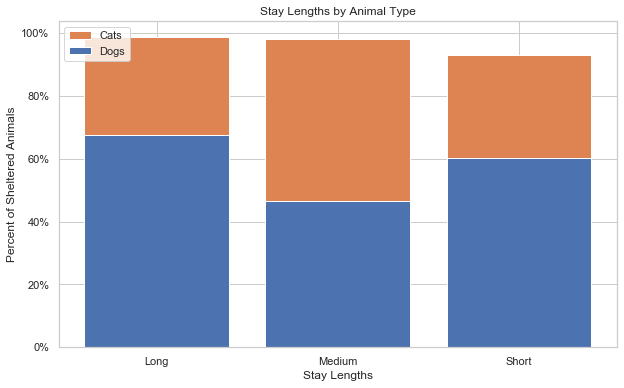

In [171]:
import matplotlib.ticker as mtick

stay_length_type_by_animal_fig, stay_length_type_by_animal_ax = plt.subplots(figsize=(10, 6))

stay_length_type_by_animal_ax.set_title('Stay Lengths by Animal Type')
stay_length_type_by_animal_ax.set_ylabel('Percent of Sheltered Animals')
stay_length_type_by_animal_ax.set_xlabel('Stay Lengths')

stay_lengths = stay_length_type_by_animal_type.columns
cat_lengths = stay_length_type_by_animal_type.loc['Cat']*100
dog_lengths = stay_length_type_by_animal_type.loc['Dog']*100

dog_bar_plt = stay_length_type_by_animal_ax.bar(stay_lengths, dog_lengths )
cat_bar_plt = stay_length_type_by_animal_ax.bar(stay_lengths, cat_lengths, bottom = dog_lengths )

stay_length_type_by_animal_ax.legend([cat_bar_plt, dog_bar_plt], ['Cats', 'Dogs'], loc = 'upper left')
stay_length_type_by_animal_ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig("./images/stay_lengths_by_type.png", dpi=150)
plt.show()

### Seasonality of Intake and Exit Volume

The number of animal intakes typically peaks in the spring and bottoms out in the fall and winter. Animal exits follow a similar trend, but tend to lag behind intakes by about one month. This pattern does not seem to hold in 2020, possibly as a result of the COVID-19 pandemic.

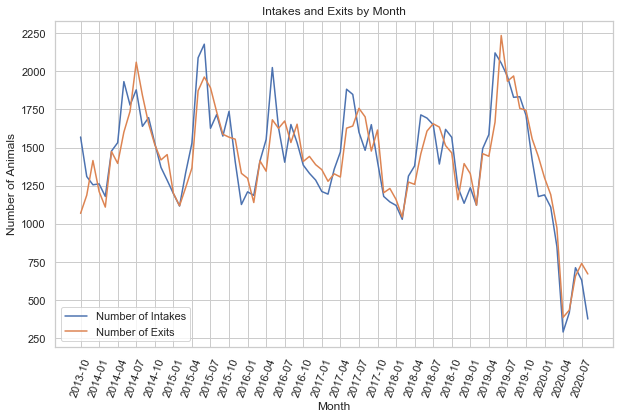

In [173]:
months = animal_shelter_df['intake_year_month'].sort_values().unique()

# Counts of Intakes and exits by Month
intakes_by_month = animal_shelter_df[['intake_year_month', 'animal_id']].groupby('intake_year_month').count()
exits_by_month = animal_shelter_df[['outcome_year_month', 'animal_id']].groupby('outcome_year_month').count()

in_out_df = pd.DataFrame(intakes_by_month).rename(columns={'animal_id': 'Number of Intakes'})
in_out_df['Number of Exits'] = exits_by_month

# Create plot
in_out_fig, in_out_ax = plt.subplots(figsize=(10, 6))

in_out_ax.set_title('Intakes and Exits by Month')
in_out_ax.set_ylabel('Number of Animals')
in_out_ax.set_xlabel('Month')

in_plt, out_plt = in_out_ax.plot(in_out_df)

in_out_ax.legend([in_plt, out_plt], ['Number of Intakes', 'Number of Exits'], loc = 'lower left')
plt.xticks(months[::3], rotation = 70)
plt.grid()

plt.savefig("./images/in_out_by_month.png", dpi=150)
plt.grid()
plt.show()

### Seasonality of Sheltered Animal Counts

The total number of sheltered animals typically peaks in May of each year and then hits its lowest point around January. There is often a secondary peak sometime after May before the number of sheltered animals drops rapidly. The number of sheltered animals has dropped precipitously in 2020, likely as a result of COVID-19.

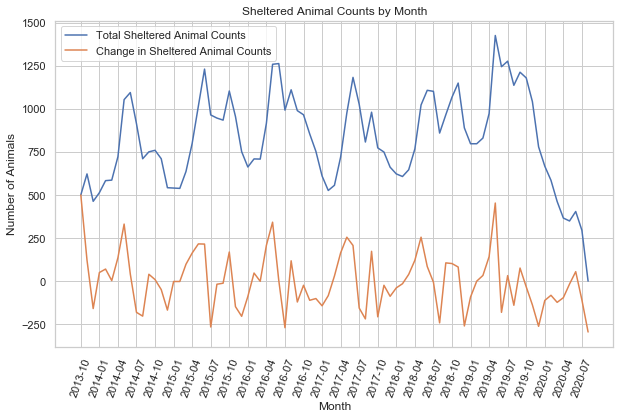

In [174]:
# Net Change in Sheltered Animal Counts
in_out_df['Change in Sheltered Animal Counts'] = in_out_df['Number of Intakes'] - in_out_df['Number of Exits']
in_out_df['Total Sheltered Animal Counts'] = in_out_df['Change in Sheltered Animal Counts'].sort_index().cumsum()
in_out_df['Total Sheltered Animal Counts'] = in_out_df['Total Sheltered Animal Counts'] + in_out_df['Total Sheltered Animal Counts'].min()

# Create Plot
shelter_count_fig, shelter_count_ax = plt.subplots(figsize=(10, 6))

shelter_count_ax.set_title('Sheltered Animal Counts by Month')
shelter_count_ax.set_ylabel('Number of Animals')
shelter_count_ax.set_xlabel('Month')

shelter_count_plt, shelter_change_plt = shelter_count_ax.plot(in_out_df[['Total Sheltered Animal Counts', 'Change in Sheltered Animal Counts']])

shelter_count_ax.legend([shelter_count_plt, shelter_change_plt], ['Total Sheltered Animal Counts', 'Change in Sheltered Animal Counts'], loc = 'upper left')
plt.xticks(months[::3], rotation = 70)
plt.grid()

plt.savefig("./images/sheltered_by_month.png", dpi=150)
plt.grid()
plt.show()

## Conclusions

This analysis leads to three recommendations for improving operations of the Austin Animal Center:

- **Engage in targeted outreach campaigns for dogs that have been sheltered at AAC for more than 30 days.** While most dogs will have been placed after 30 days, this may help reduce the number of dogs that end up having extended stays, potentially requiring many more months of care.
- **Reduce current spending until the numbers of intakes and sheltered animals return to normal.** Given the reduced activity during this period, AAC should consider ways to temporarily reduce costs by changing space utilization or staffing.
- **Hire seasonal staff and rent temporary space for May through December.** To accommodate the high volume of intakes and number of sheltered animals in the spring and fall, AAC should leverage seasonal resources, rather than full-year ones. This will allow AAC to cut back on expenditures during the months when there is lower

### Next Steps

Further analyses could yield additional insights to further improve operations at AAC:

- **Better prediction of animals that are likely to have long stays.** This modeling could use already available data, such as breed and intake condition.
- **Model need for medical support.** This modeling could predict the need for specialized personnel to address animals' medical needs, including neutering, using intake condition and sex data.
- **Predicting undesirable outcomes.** This modeling could identify animals that are more likely to have undesirable outcomes (e.g. Euthanasia) for targeted medical support or outreach.